## Crop hand region from original images

In [ ]:
# Crop hand region from original images
import cv2
import json
import os 
working_dir = 'C:\\Data\\5525 project\\hagrid\\data\\'
os.chdir(working_dir)
classname = 'peace_inverted'
#image_folder = working_dir + 'train_val_' + classname + '\\'
image_folder = working_dir  + 'test\\'+classname + '\\'
#extr_image_folder = working_dir + 'train_val_' + classname + '_extr\\'
extr_image_folder = working_dir + 'test\\'+ classname + '_extr\\'
#ann_name = working_dir + 'ann_train_val\\ann_train_val\\' + classname + '.json'
ann_name = working_dir + 'ann_test\\ann_test\\' + classname + '.json'
os.mkdir(extr_image_folder)

# comment this line for normal classes
#classname = 'no_gesture'

no_gesture = []
f = open(ann_name)
info_ann = json.load(f)
for image_num in info_ann:
    image_name_full = image_num + '.jpg'
    image = cv2.imread(image_folder + image_name_full)
    info_image = info_ann[image_num]
    bbox = []
    if info_image['labels'][0] == classname:
        bbox = info_image['bboxes'][0]
    elif len(info_image['labels']) > 1 and info_image['labels'][1] == classname:
        bbox = info_image['bboxes'][1]
    else:
        no_gesture.append(image_num)
        continue
        
    left = int(bbox[0]*image.shape[1])
    right = int((bbox[0]+bbox[2])*image.shape[1])
    up = int(bbox[1]*image.shape[0])
    down = int((bbox[1]+bbox[3])*image.shape[0])
    
    
    clone = image.copy()
    crop_img = clone[up:down,left:right]
    os.chdir(extr_image_folder)
    cv2.imwrite(image_name_full, crop_img)
    
    
f.close()    
os.chdir(working_dir)
print("done")

## Example using Mediapipe to calculate landmarks

shape (1920, 1437, 3)
Handedness: [classification {
  index: 0
  score: 0.9756987
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.32940394
  y: 0.35411888
  z: 4.2416116e-07
}
landmark {
  x: 0.36344334
  y: 0.33973685
  z: -0.013280837
}
landmark {
  x: 0.39029416
  y: 0.32140675
  z: -0.027231986
}
landmark {
  x: 0.41577795
  y: 0.30593017
  z: -0.04289294
}
landmark {
  x: 0.4339772
  y: 0.28763157
  z: -0.057100967
}
landmark {
  x: 0.35008073
  y: 0.27355018
  z: -0.012849498
}
landmark {
  x: 0.3790752
  y: 0.2586273
  z: -0.038957216
}
landmark {
  x: 0.4035238
  y: 0.2631843
  z: -0.05674467
}
landmark {
  x: 0.42176253
  y: 0.27398226
  z: -0.064862326
}
landmark {
  x: 0.33009782
  y: 0.2616522
  z: -0.020639556
}
landmark {
  x: 0.3390613
  y: 0.22544144
  z: -0.037345126
}
landmark {
  x: 0.35997656
  y: 0.20269695
  z: -0.04485811
}
landmark {
  x: 0.37867066
  y: 0.18346122
  z: -0.047767177
}
landmark {
  x: 0.30856645
  y: 0.2615215
  z: -0.032681797
}
landmark {

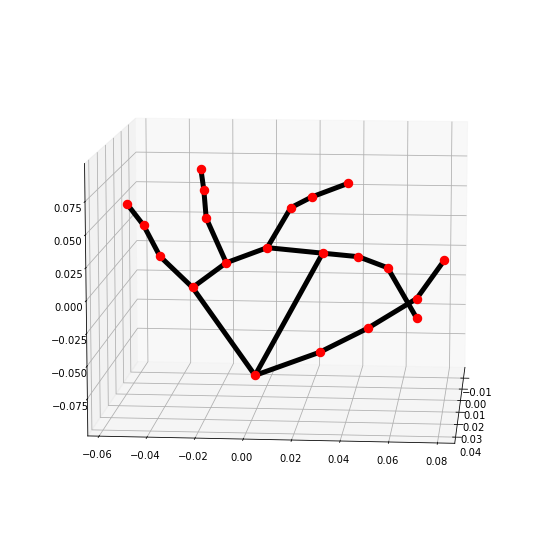

In [10]:
# Example of using mediapipe to calculate landmarks 
# cwd should be the main directory. Change image_num as needed
# os.chdir('C:\\Data\\5525 project\\CSCI5525-Project\\code\\')
import cv2
import json
import os 
import mediapipe as mp
import numpy as np
# classname = 'call'
# working_dir = 'C:\\Data\\5525 project\\CSCI5525-Project'
# images_dir = 'C:\\Data\\5525 project\\CSCI5525-Project\\data\\'# train_val_' + classname + '_2000\\'
# ann_name = 'C:\\Data\\5525 project\\CSCI5525-Project\\ann_data\\' + classname + '.json'

cwd = os.getcwd()
images_dir = cwd + '\\example\\ok\\'
ann_name = images_dir + 'ok.json'
image_num =  '06cd9ef9-7260-4b5a-a823-63a4f8098e0a'
os.chdir(images_dir)

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

IMAGE_FILES = [images_dir+image_num+'.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.imread(file)
    print('shape',image.shape)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    print(annotated_image.shape)
    writeStatus = cv2.imwrite(images_dir+'/annotated_' + str(image_num) + '.jpg', annotated_image)
    if writeStatus is True:
        print("image written")
    else:
        print("problem") # or raise exception, handle problem, etc.
    #Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
    
f = open(ann_name)
info_ann = json.load(f)
info_image = info_ann[image_num]
landmarks = info_image['landmarks']
[x1,y1,width,height] = info_image['bboxes'][0]

f.close()
os.chdir(cwd)

## Extract landmarks (skeleton) from training images and test images. Write landmarks to .csv files

In [16]:
import json
import os, glob
import numpy as np


# construct training data
# mapping gesture to class number
gesture_class = {'call':0, 'dislike':1, 'fist':2, 'like':3, 'mute':4, 'ok':5, 'one':6, 'palm':7, 'peace':8, 
                 'peace_inverted':9, 'stop':10, 'stop_inverted':11}
X=[]
y=[]
imageNum=[]
cwd = os.getcwd()

for gesture,classNo in gesture_class.items():
    # n=0
    images_dir = cwd + '\\data\\train\\train_val_' + gesture + '_2000\\'
    ann_name = images_dir + gesture + '.json'
    f = open(ann_name)
    info_ann = json.load(f)
    os.chdir(images_dir)
    for image in glob.glob("*.jpg"):  # all images name in the directory for the class
        image_num = image.replace('.jpg','')
        info_image = info_ann[image_num]
        if info_image['labels'][0] == gesture:  # the first hand is the gesture hand
            landmarks = info_image['landmarks'][0]
            [x1,y1,width,height] = info_image['bboxes'][0]
        else:
            landmarks = info_image['landmarks'][1]
            [x1,y1,width,height] = info_image['bboxes'][1]
        if len(landmarks) == 0: # some of the landmark data is missing
            continue
            
        # normalize by the size of the box
        landmarks = np.array(landmarks)
        landmarks[:,0]=(landmarks[:,0]-x1)/(width)
        landmarks[:,1]=(landmarks[:,1]-y1)/(height)

        landmark_flat = landmarks.flatten()

        # if len(landmarks) == 0: # some of the landmark data is missing
        #     n+= 1
        #     print(gesture)
        #     print(image_num)
            
        X.append(landmark_flat)
        y.append(classNo)
        imageNum.append(image_num)
    # print(n)
    f.close
        
X = np.array(X)
y = np.array(y)
imageNum = np.array(imageNum)
y = y.reshape(-1, 1)
imageNum = imageNum.reshape(-1, 1)
X_y = np.append(X, y, 1)
X_y_image = np.append(X_y, imageNum, 1)
print('training set shape:', X_y.shape)
os.chdir(cwd)  
np.savetxt("landmarks_train.csv", X_y ,delimiter =", ", fmt ='% s')
np.savetxt("landmarks_plus_name_train.csv", X_y_image ,delimiter =", ", fmt ='% s')


# construct test data
# mapping gesture to class number
test_nog = False  # test set contains invalid_gesture if True
if test_nog:
    gesture_class_test = {'call':0, 'dislike':1, 'fist':2, 'like':3, 'mute':4, 'ok':5, 'one':6, 'palm':7, 'peace':8, 
                      'peace_inverted':9, 'stop':10, 'stop_inverted':11, 'invalid_gesture':12}
else:
    gesture_class_test = {'call':0, 'dislike':1, 'fist':2, 'like':3, 'mute':4, 'ok':5, 'one':6, 'palm':7, 'peace':8, 
                      'peace_inverted':9, 'stop':10, 'stop_inverted':11}

X_t=[]
y_t=[]
imageNum_t=[]

for gesture,classNo in gesture_class_test.items():
    if classNo < 12:
        images_dir = cwd + '\\data\\test\\test_' + gesture 
        ann_name = images_dir + '\\' + gesture + '.json'
        f = open(ann_name)
        info_ann = json.load(f)
        os.chdir(images_dir)
        
        for image in glob.glob("*.jpg"):
            image_num = image.replace('.jpg','')
            info_image = info_ann[image_num]
            if info_image['labels'][0] == gesture:  # the first hand is the gesture hand
                landmarks = info_image['landmarks'][0]
                [x1,y1,width,height] = info_image['bboxes'][0]
            else:
                landmarks = info_image['landmarks'][1]
                [x1,y1,width,height] = info_image['bboxes'][1]
            if len(landmarks) == 0: # some of the landmark data is missing
                continue

            # normalize by the size of the box
            landmarks = np.array(landmarks)
            landmarks[:,0]=(landmarks[:,0]-x1)/(width)
            landmarks[:,1]=(landmarks[:,1]-y1)/(height)

            landmark_flat = landmarks.flatten()

            # if len(landmarks) == 0: # some of the landmark data is missing
            #     n+= 1
            #     print(gesture)
            #     print(image_num)

            X_t.append(landmark_flat)
            y_t.append(classNo)
            imageNum_t.append(image_num)
        # print(n)
        f.close
    if test_nog and classNo == 12:
        gesture_class = ['four','no_gesture','rock','three','three2']
        for subgesture in gesture_class:  # subgesture is the gesture inside no_gesture folder
            images_dir = cwd + '\\data\\test\\test_' + gesture + '\\' + subgesture
            if subgesture != 'no_gesture':
                ann_name = images_dir + '\\' + subgesture + '.json'
            else:
                ann_name = images_dir + '\\' + 'call' + '.json'
                
            f = open(ann_name)
            info_ann = json.load(f)
            os.chdir(images_dir)

            for image in glob.glob("*.jpg"):
                image_num = image.replace('.jpg','')
                if subgesture == 'no_gesture':
                    image_num = image_num.replace('nogesture','')
                
                info_image = info_ann[image_num]
                if info_image['labels'][0] == subgesture:  # the first hand is the gesture hand
                    landmarks = info_image['landmarks'][0]
                    [x1,y1,width,height] = info_image['bboxes'][0]
                else:
                    landmarks = info_image['landmarks'][1]
                    [x1,y1,width,height] = info_image['bboxes'][1]
                if len(landmarks) == 0: # some of the landmark data is missing
                    continue

                # normalize by the size of the box
                landmarks = np.array(landmarks)
                landmarks[:,0]=(landmarks[:,0]-x1)/(width) 
                landmarks[:,1]=(landmarks[:,1]-y1)/(height)
                

                landmark_flat = landmarks.flatten()

                # if len(landmarks) == 0: # some of the landmark data is missing
                #     n+= 1
                #     print(gesture)
                #     print(image_num)

                X_t.append(landmark_flat)
                y_t.append(classNo)
                imageNum_t.append(image_num)
            # print(n)
            f.close    
            
os.chdir(cwd)        
X_t = np.array(X_t)
y_t = np.array(y_t)
imageNum_t = np.array(imageNum_t)
y_t = y_t.reshape(-1, 1)
imageNum_t = imageNum_t.reshape(-1, 1)
X_y_t = np.append(X_t, y_t, 1)
X_y_image_t = np.append(X_y_t, imageNum_t, 1)
print('test set shape:',X_y_t.shape)
if no_gesture:
    np.savetxt("landmarks_nog_test.csv", X_y_t ,delimiter =", ", fmt ='% s')
    np.savetxt("landmarks_plus_name_nog_test.csv", X_y_image_t ,delimiter =", ", fmt ='% s')
else:
    np.savetxt("landmarks_test.csv", X_y_t ,delimiter =", ", fmt ='% s')
    np.savetxt("landmarks_plus_name_test.csv", X_y_image_t ,delimiter =", ", fmt ='% s')    



training set shape: (23714, 43)
test set shape: (5931, 43)


## load skeleton data into dataloaders

In [17]:
# load libraries
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [42]:
# load data
working_dir = os.getcwd()  # should be the main directory

dataset = 'landmarks_train.csv'
test_nog = False  # Test set contains invalid_gesture class if True
if test_nog:
    testset = 'landmarks_nog_test.csv'
else:
    testset = 'landmarks_test.csv'
X = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(0, 21 * 2)))  # first 21*2 columns are 21 (x,y) landmarks
y = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(21 * 2))
X_t = np.loadtxt(testset, delimiter=',', dtype='float32', usecols=list(range(0, 21 * 2)))  # first 21*2 columns are 21 (x,y) landmarks
y_t = np.loadtxt(testset, delimiter=',', dtype='int32', usecols=(21 * 2))
# # train-test split
# RANDOM_SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED, shuffle=True)

# count number of instances in classes
# counts = np.unique(y, return_counts=True)
# print('number of instances in classes before splitting:')
# print(counts)

print('X_train shape: ', X.shape)
print('X_test shape: ', X_t.shape)

# build dataLoader for nn
batch_size = 64

tensor_X_train = torch.Tensor(X) # transform to torch tensor
tensor_y_train = torch.from_numpy(y)
tensor_X_test = torch.Tensor(X_t) 
tensor_y_test = torch.from_numpy(y_t)

train_dataset = TensorDataset(tensor_X_train,tensor_y_train) # create datset
test_dataset = TensorDataset(tensor_X_test,tensor_y_test) # create datset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


print('batch number of train_loader: ', len(train_loader))


X_train shape:  (23714, 42)
X_test shape:  (5931, 42)
batch number of train_loader:  371


## MLP model

In [43]:
import torch.nn as nn
class MyMLP(nn.Module):  # MyMLP inherits nn.Module as base class
    
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, max_epochs=10):
        '''
        input_size: [int], feature dimension 
        hidden_size: number of hidden nodes in the hidden layer
        output_size: number of classes in the dataset, 
        learning_rate: learning rate for SGD
        max_epochs: maximum number of epochs to run stochastic gradient descent
        '''
        
        super(MyMLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        ''' Function to do the forward pass with images x'''
        ### Use the layers you constructed in __init__ and pass x through the network
        ### and return the output
        hidden = self.hidden(x)
        z = self.relu(hidden)
        output = self.output(z)
        return output

    def fit(self, data_loader, criterion, optimizer):
        '''
        Function used to train the MLP

        data_loader: includes the feature matrix and class labels corresponding to the training set,
        criterion: the loss function used,
        optimizer: which optimization method to train the model.
        '''
        train_loss = []
        train_err = []

        for i in range(self.max_epochs):    # in one epoch, all datapoints in batchs (128 points) are sent in for weight update (minibatch)

            for j,(landmarks,labels) in enumerate(data_loader):
#                 print(images.size())
                
#                 print(images.size())
                labels = labels.reshape(-1)  # convert to 1D tensor
                labels = labels.long()
                # print(labels.size())
                # Forward pass
                yhat = self.forward(landmarks)
                #print('yhat type', yhat.dtype)
                #print('labels type', labels.dtype)
                # print(yhat.size())
                # Backward pass and optimize 
                loss = criterion(yhat, labels)
                optimizer.zero_grad()  #  clears x.grad for every parameter x in the optimizer.
                loss.backward()  # computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x
                optimizer.step()  # parameter update
                # Track the loss and error rate

            # Print training loss and error rate in each epoch
            trainLoss, trainErr, ymax, ypred = self.predict(data_loader, criterion)
            trainLoss = trainLoss
            train_loss.append(trainLoss)
            train_err.append(trainErr)
            print('epoch ',i+1)
            print('train loss value: ', trainLoss.item())
            print('train error value: ', trainErr.item())
        return (train_loss, train_err)

    def predict(self, test_loader, criterion):
        '''
        Function used to predict with the MLP

        test_loader: includes the feature matrix and classlabels corresponding to the test set,
        criterion: the loss function used.
        '''
        test_loss = 0
        test_err = 0
        ymax_r = []
        yhat_r = []
        with torch.no_grad():
            for j,(landmarks,labels) in enumerate(test_loader):
                labels = labels.reshape(-1)  # convert to 1D tensor
                labels = labels.long()                
                # compute prediction output and loss
                yhat = self.forward(landmarks)
                test_loss += criterion(yhat, labels)
                m = nn.Softmax(dim=1)
                ysoftmax = m(yhat)
                # measure loss and error rate and record
                y_class = np.argmax(ysoftmax, axis=1)  # class prediction for each datapoint
                ymax,indexmax = torch.max(ysoftmax, 1)
                ymax_r.extend(ymax)
                yhat_r.extend(y_class)
                test_err += torch.sum(y_class != labels)

        # Print test loss and error rate
        return (test_loss/(j+1), test_err/len(test_loader.dataset), ymax_r, yhat_r)

## run the MLP model

epoch  1
train loss value:  1.113390326499939
train error value:  0.37821540236473083
epoch  2
train loss value:  0.6706352233886719
train error value:  0.2690393924713135
epoch  3
train loss value:  0.5136011838912964
train error value:  0.1315256804227829
epoch  4
train loss value:  0.40414053201675415
train error value:  0.09315172582864761
epoch  5
train loss value:  0.3443019390106201
train error value:  0.09682044386863708
epoch  6
train loss value:  0.34495943784713745
train error value:  0.13451969623565674
epoch  7
train loss value:  0.2548731863498688
train error value:  0.06152483820915222
epoch  8
train loss value:  0.246128112077713
train error value:  0.07657923549413681
epoch  9
train loss value:  0.24586322903633118
train error value:  0.08560343831777573
epoch  10
train loss value:  0.20195630192756653
train error value:  0.05397655442357063
epoch  11
train loss value:  0.17888212203979492
train error value:  0.04419330507516861
epoch  12
train loss value:  0.183744728

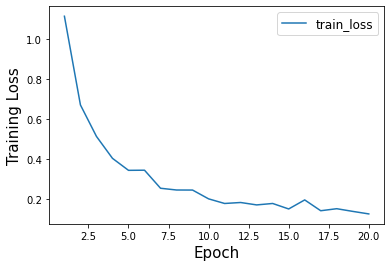

Test set loss: 0.11281272023916245
Test set error rate: 0.03220367431640625


In [44]:
# run nn
input_size = 21*2
hidden_size = 20

if test_nog:
    output_size = 13
else:
    output_size = 12

learning_rate = 0.1

max_epochs = 20

# instantiate mlp object
model = MyMLP(input_size, hidden_size, output_size, learning_rate=learning_rate, max_epochs=max_epochs)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# fit mlp model using all training data
train_loss, train_err = model.fit(train_loader, criterion, optimizer)

# predict on test data
test_loss,test_err,ymax,yhat = model.predict(test_loader, criterion)

# training loss plot
epoch_list = range(1,max_epochs+1)
plt.figure()
plt.plot(epoch_list, train_loss, label="train_loss")
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Training Loss", fontsize=15)
plt.legend(fontsize=12)
plt.savefig('training loss of MLP.jpg', dpi=1000)
plt.show()

print('Test set loss:', test_loss.item())
print('Test set error rate:', test_err.item())

if test_nog:
    print('Test error rate is much larger than training error, because the invalid gesture was not seen by the model')

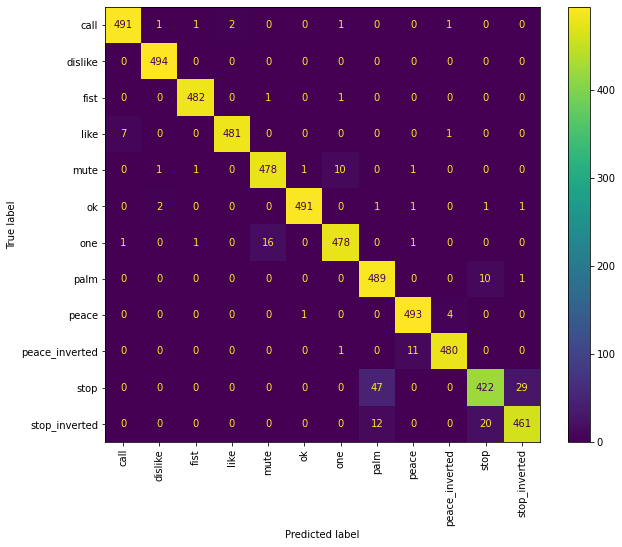

In [45]:
working_dir = os.getcwd()  # should be the main directory
yhat = np.array(yhat)
cm = confusion_matrix(y_t, yhat)
if test_nog:
    gesture_class_test = {'call':0, 'dislike':1, 'fist':2, 'like':3, 'mute':4, 'ok':5, 'one':6, 'palm':7, 'peace':8, 
                      'peace_inverted':9, 'stop':10, 'stop_inverted':11, 'invalid_gesture':12}
else:
    gesture_class_test = {'call':0, 'dislike':1, 'fist':2, 'like':3, 'mute':4, 'ok':5, 'one':6, 'palm':7, 'peace':8, 
                      'peace_inverted':9, 'stop':10, 'stop_inverted':11}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gesture_class_test.keys())
disp.plot(xticks_rotation='vertical')

figure = plt.gcf()
figure.set_size_inches(10, 8)
if test_nog:
    plt.savefig('confusion_matrix_MyMLP_skeleton_12train_13test.jpg', dpi=1000)
else:
    plt.savefig('confusion_matrix_MyMLP_skeleton_12train_12test.jpg', dpi=1000)
plt.show()


## Autoencoder for anomaly (invalid gestures) detection

In [32]:
import torch.nn as nn
class AE_skeleton(nn.Module):
    def __init__(self):
        super(AE_skeleton, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(42, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU()
        )
        self.dec = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),         
            nn.Linear(128, 42),
            nn.Sigmoid()
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

## Train the autoencoder

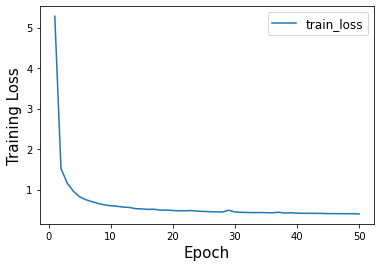

In [36]:
lr = 0.1e-2         # learning rate
w_d = 1e-5        # weight decay  
epochs = 50

model_ae_skeleton = AE_skeleton()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_ae_skeleton.parameters(), lr=lr)# , weight_decay=w_d)

loss_record=[]
#loss_record = np.array(loss_record)
# training AE
model_ae_skeleton.train()
for epoch in range(epochs):
    running_loss = 0.0
    for bx, (data,labels) in enumerate(train_loader):
        sample = model_ae_skeleton(data)
        loss = criterion(data, sample)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss
    loss_record.append(epoch_loss)
    # print('-----------------------------------------------')
    # print('[EPOCH] {}/{}\n[LOSS] {}'.format(epoch+1,epochs,epoch_loss))
    
# training loss plot
epoch_list = range(1,epoch+2)
plt.figure()
plt.plot(epoch_list, loss_record, label="train_loss")
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Training Loss", fontsize=15)
plt.legend(fontsize=12)
plt.savefig('training loss of autoencoder.jpg', dpi=1000)
plt.show()



## Test the autoencoder

Test accuracy of the autoencoder is: 0.9819862155388471


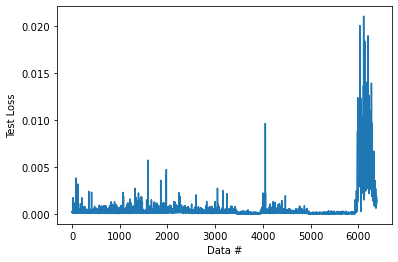

<Figure size 432x288 with 0 Axes>

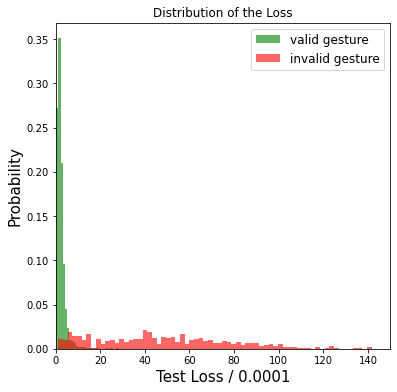

In [41]:
# save the weights of the autoencoder_skeleton
# save_dir = os.getcwd()
# torch.save(model_ae_skeleton.state_dict(), save_dir)


# test loader with one datapoint per batch
test_loader_one = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1,
                                          shuffle=False)

model_ae_skeleton.eval()
threshold_loss = 0.0015  # threshold value for separation of valid and invalid gestures
testset_loss = []
y_gt = torch.tensor([])  # 1 for valid gesture, 0 for no_gesture
y_pred = []  # 1 for valid gesture, 0 for no_gesture
with torch.no_grad():
    for j,(landmarks,labels) in enumerate(test_loader_one):
        output = model_ae_skeleton(landmarks)
        loss = criterion(output, landmarks).item()
        testset_loss.append(loss)
        y_gt = torch.cat((y_gt, (labels[:]<12)))
        y_pred.append(loss<threshold_loss)
testset_loss = np.array(testset_loss)
#print(testset_loss.shape)
# print('y_gt shape:',(y_gt).shape)  
# print(y_gt)
# print(testset_loss)
y_pred = torch.tensor(y_pred)
print('Test accuracy of the autoencoder is:',torch.sum(torch.eq(y_gt, y_pred)).item()/(y_gt).size(0))

data_list = range(1,len(test_dataset)+1)
plt.figure()
data_list_part = data_list[0:]
testset_loss_part = testset_loss[0:]
plt.plot(data_list_part, testset_loss_part)
plt.xlabel("Data #")
plt.ylabel("Test Loss")
plt.show()

# histogram
plt.figure()
gesture = testset_loss[y_gt==1]*10**4
no_gesture = testset_loss[y_gt==0]*10**4

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(gesture, bins=100, density=True, label="valid gesture", alpha=.6, color="green")
ax.hist(no_gesture, bins=100, density=True, label="invalid gesture", alpha=.6, color="red")
plt.xlim(0, 150)
plt.title("Distribution of the Loss")
plt.xlabel('Test Loss / 0.0001', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('histogram of AE test loss of gesture vs no_gesture.jpg', dpi=1000)
plt.show()